<a href="https://colab.research.google.com/github/Divyapahuja31/Benford-s-Law-Analysis/blob/main/Copy_of_Roomies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Air Quality Index of Indian Cities**

Nitya Jain (nitya.jain@adypu.edu.in)

Saniya Jabbar Khatik (saniya.khatik@adypu.edu.in)

Vanshika Shah (vanshika.k@adypu.edu.in)

Divya Pahuja (divya.pahuja@adypu.edu.in)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!gdown "https://drive.google.com/uc?export=download&id=1CQdohWGHZw2_9rKwwc9ljuiHRLVATNJi" -O air_quality_index.csv

df = pd.read_csv("air_quality_index.csv")
df.head()


Downloading...
From: https://drive.google.com/uc?export=download&id=1CQdohWGHZw2_9rKwwc9ljuiHRLVATNJi
To: /content/air_quality_index.csv
100% 363k/363k [00:00<00:00, 118MB/s]


,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Bihar,Gaya,"Kareemganj, Gaya - BSPCB",26-04-2025 18:00:00,24.792403,84.992416,NO2,1.0,8.0,5.0
1,India,Bihar,Gaya,"SFTI Kusdihra, Gaya - BSPCB",26-04-2025 18:00:00,24.762518,84.982348,NO2,15.0,19.0,18.0
2,India,Bihar,Gaya,"SFTI Kusdihra, Gaya - BSPCB",26-04-2025 18:00:00,24.762518,84.982348,NH3,3.0,4.0,3.0
3,India,Bihar,Gaya,"SFTI Kusdihra, Gaya - BSPCB",26-04-2025 18:00:00,24.762518,84.982348,SO2,8.0,11.0,9.0
4,India,Bihar,Gaya,"SFTI Kusdihra, Gaya - BSPCB",26-04-2025 18:00:00,24.762518,84.982348,OZONE,3.0,81.0,54.0


For Pollutant AVG :-

In [ ]:
# Verify Benford's Law for 'pollutant_avg' in AQI dataset
pollutant_digits = [
    int(str(avg).replace(".", "")[0]) for avg in df["pollutant_avg"] if avg > 0
]
observed_counts = [
    pollutant_digits.count(digit) for digit in range(1, 10)
]
total_records = len(pollutant_digits)
expected_counts = [
    total_records * np.log10(1 + 1 / digit) for digit in range(1, 10)
]
print("Digit\tObserved\tExpected")
for digit in range(1, 10):
    print(f"{digit}\t{observed_counts[digit-1]}\t\t{expected_counts[digit-1]}")


Digit	Observed	Expected
1	856		897.9724770656559
2	482		525.2802257630972
3	362		372.69225130255865
4	321		289.0825688030323
5	247		236.19765696006482
6	216		199.70227346811924
7	203		172.98997783443951
8	156		152.5879744605384
9	140		136.49459434249394


In [ ]:
from scipy.stats import chisquare

chi2_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)
print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_value}")
# Your data slightly deviates from Benford's Law.

Chi-squared statistic: 16.555151511743013
P-value: 0.03508937824377296


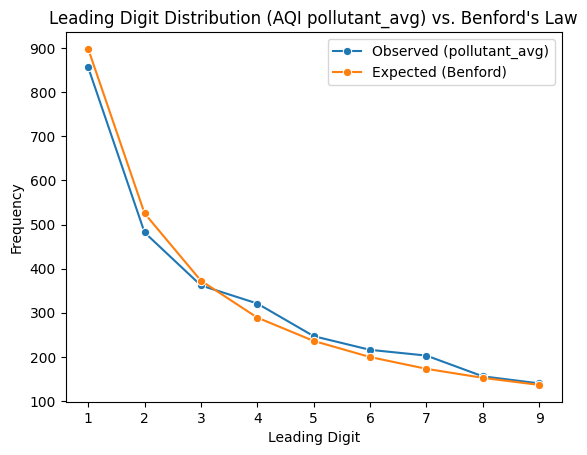

In [ ]:
# Define the digits (1 through 9) for the x-axis
digits = range(1, 10)
sns.lineplot(x=digits, y=observed_counts, label="Observed (pollutant_avg)", marker="o")
sns.lineplot(x=digits, y=expected_counts, label="Expected (Benford)", marker="o")
plt.xlabel("Leading Digit")
plt.ylabel("Frequency")
plt.title("Leading Digit Distribution (AQI pollutant_avg) vs. Benford's Law")
plt.legend()
plt.show()


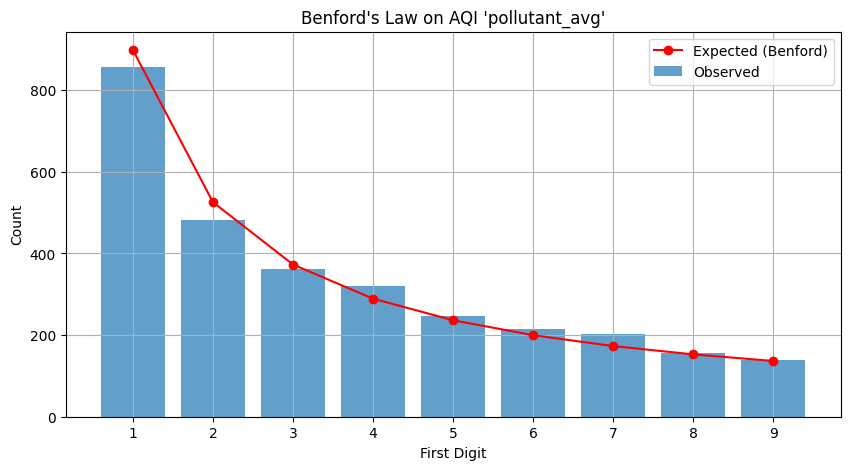

In [ ]:
digits = list(range(1, 10))

plt.figure(figsize=(10, 5))
plt.bar(digits, observed_counts, label="Observed", alpha=0.7)
plt.plot(digits, expected_counts, color='red', marker='o', label="Expected (Benford)")
plt.xticks(digits)
plt.xlabel("First Digit")
plt.ylabel("Count")
plt.title("Benford's Law on AQI 'pollutant_avg'")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from numpy import log10

observed_props = [count / total_records for count in observed_counts]
expected_props = [log10(1 + 1/d) for d in range(1, 10)]

mad = sum(abs(o - e) for o, e in zip(observed_props, expected_props)) / 9
print(f"Mean Absolute Deviation (MAD1): {mad:.5f}")


Mean Absolute Deviation (MAD1): 0.00715


In [ ]:
# print("Observed proportions (avg):", observed_props)

For Pollutant MAX :-

In [ ]:
# Verify Benford's Law for 'pollutant_max' in AQI dataset
pollutant_digits = [
    int(str(maxx).replace(".", "")[0]) for maxx in df["pollutant_max"] if maxx > 0
]
observed_counts = [
    pollutant_digits.count(digit) for digit in range(1, 10)
]
total_records = len(pollutant_digits)
expected_counts = [
    total_records * np.log10(1 + 1 / digit) for digit in range(1, 10)
]
print("Digit\tObserved\tExpected")
for digit in range(1, 10):
    print(f"{digit}\t{observed_counts[digit-1]}\t\t{expected_counts[digit-1]}")


Digit	Observed	Expected
1	927		897.9724770656559
2	409		525.2802257630972
3	385		372.69225130255865
4	277		289.0825688030323
5	237		236.19765696006482
6	216		199.70227346811924
7	193		172.98997783443951
8	191		152.5879744605384
9	148		136.49459434249394


In [ ]:
from scipy.stats import chisquare

chi2_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)
print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_value}")

Chi-squared statistic: 41.8774223771972
P-value: 1.4278929991635329e-06


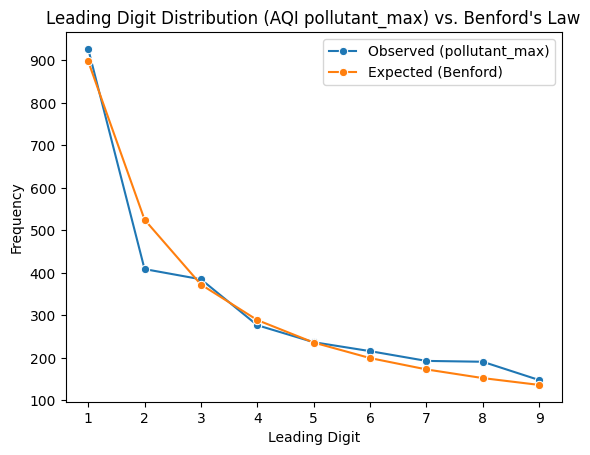

In [ ]:
# Define the digits (1 through 9) for the x-axis
digits = range(1, 10)
sns.lineplot(x=digits, y=observed_counts, label="Observed (pollutant_max)", marker="o")
sns.lineplot(x=digits, y=expected_counts, label="Expected (Benford)", marker="o")
plt.xlabel("Leading Digit")
plt.ylabel("Frequency")
plt.title("Leading Digit Distribution (AQI pollutant_max) vs. Benford's Law")
plt.legend()
plt.show()


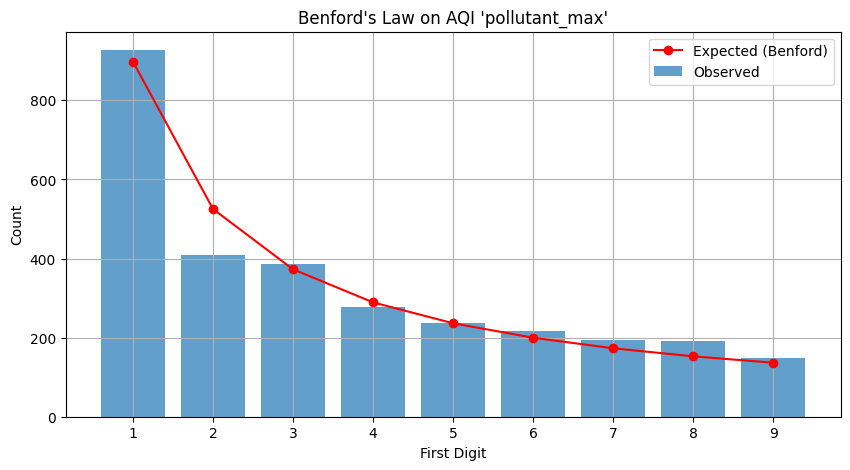

In [ ]:
digits = list(range(1, 10))

plt.figure(figsize=(10, 5))
plt.bar(digits, observed_counts, label="Observed", alpha=0.7)
plt.plot(digits, expected_counts, color='red', marker='o', label="Expected (Benford)")
plt.xticks(digits)
plt.xlabel("First Digit")
plt.ylabel("Count")
plt.title("Benford's Law on AQI 'pollutant_max'")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from numpy import log10

observed_props = [count / total_records for count in observed_counts]
expected_props = [log10(1 + 1/d) for d in range(1, 10)]

mad = sum(abs(o - e) for o, e in zip(observed_props, expected_props)) / 9
print(f"Mean Absolute Deviation (MAD2): {mad:.5f}")


Mean Absolute Deviation (MAD2): 0.00956


In [ ]:
# print("Observed proportions (max):", observed_props)

For Pollutant MIN :-

In [ ]:
# Verify Benford's Law for 'pollutant_min' in AQI dataset
pollutant_digits = [
    int(str(minn).replace(".", "")[0]) for minn in df["pollutant_min"] if minn > 0
]
observed_counts = [
    pollutant_digits.count(digit) for digit in range(1, 10)
]
total_records = len(pollutant_digits)
expected_counts = [
    total_records * np.log10(1 + 1 / digit) for digit in range(1, 10)
]
print("Digit\tObserved\tExpected")
for digit in range(1, 10):
    print(f"{digit}\t{observed_counts[digit-1]}\t\t{expected_counts[digit-1]}")


Digit	Observed	Expected
1	878		897.9724770656559
2	545		525.2802257630972
3	377		372.69225130255865
4	317		289.0825688030323
5	237		236.19765696006482
6	218		199.70227346811924
7	159		172.98997783443951
8	151		152.5879744605384
9	101		136.49459434249394


In [ ]:
from scipy.stats import chisquare

chi2_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)
print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_value}")
# Your data slightly deviates from Benford's Law.

Chi-squared statistic: 15.987706906129594
P-value: 0.042556402279733535


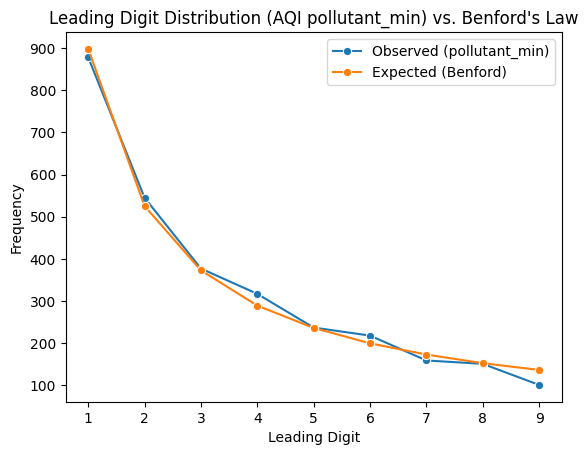

In [ ]:
# Define the digits (1 through 9) for the x-axis
digits = range(1, 10)
sns.lineplot(x=digits, y=observed_counts, label="Observed (pollutant_min)", marker="o")
sns.lineplot(x=digits, y=expected_counts, label="Expected (Benford)", marker="o")
plt.xlabel("Leading Digit")
plt.ylabel("Frequency")
plt.title("Leading Digit Distribution (AQI pollutant_min) vs. Benford's Law")
plt.legend()
plt.show()


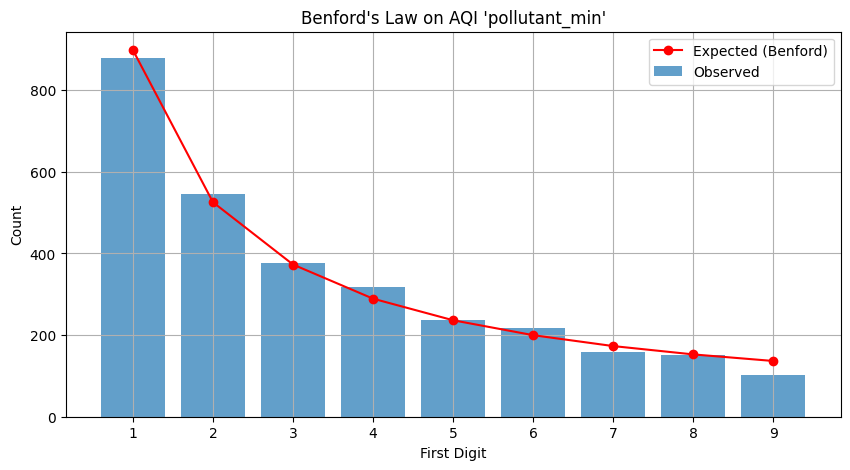

In [ ]:
digits = list(range(1, 10))

plt.figure(figsize=(10, 5))
plt.bar(digits, observed_counts, label="Observed", alpha=0.7)
plt.plot(digits, expected_counts, color='red', marker='o', label="Expected (Benford)")
plt.xticks(digits)
plt.xlabel("First Digit")
plt.ylabel("Count")
plt.title("Benford's Law on AQI 'pollutant_min'")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from numpy import log10

observed_props = [count / total_records for count in observed_counts]
expected_props = [log10(1 + 1/d) for d in range(1, 10)]

mad = sum(abs(o - e) for o, e in zip(observed_props, expected_props)) / 9
print(f"Mean Absolute Deviation (MAD3): {mad:.5f}")


Mean Absolute Deviation (MAD3): 0.00529


In [ ]:
# print("Observed proportions (min):", observed_props)

**INSIGHTS :-**

Benford’s Law predicts the frequency distribution of leading digits in many naturally occurring datasets. This analysis tests how well three pollutant metrics — pollutant_min, pollutant_avg, and pollutant_max — conform to

**Benford’s Law using:**

*   Mean Absolute Deviation (MAD)
*   Chi-square statistic
*   Visual comparison of digit distribution


**Pollutant Min:** Closely follows Benford’s Law. Data appears naturally distributed.

1.   Statistical Fit:
*   Lowest MAD (0.00529) indicates very close conformity.
*   p-value (0.0426) is just below 0.05 — statistically significant, but marginal.

2.   Visual Fit:
*   Graph closely follows Benford’s curve, with only minor deviations.

3.   Inference:
*   The minimum pollutant values strongly align with Benford’s Law, suggesting high data integrity and natural variation.


**Pollutant Avg:** Acceptable conformity, small deviations likely stem from averaging.

1.   Statistical Fit:
*   MAD = 0.00715 → acceptable conformity.
*   p-value = 0.0351 → slight statistical deviation.

2.   Visual Fit:
*   Matches Benford’s trend well, with minor dips.

3.   Inference:
*   The average AQI data shows moderate conformity. Minor deviations likely arise from the averaging process and are not cause for concern.

**Pollutant Max:** Significant deviation.

1.   Statistical Fit:
*   Highest MAD (0.00956) and extremely low p-value (1.43e-6) indicate significant deviation.

2.   Visual Fit:
*   Strong mismatch, especially around digits 2 and 8.

3.   Inference: The maximum AQI values do not follow Benford’s Law, which may point to:

*   Manual rounding or capping at thresholds.
*   Sensor saturation or limited dynamic range.
*   Reporting biases or data preprocessing anomalies.



**Overall Insight:**

*   The dataset partially conforms to Benford’s Law.
*   Min and Avg values are likely naturally occurring and trustworthy.
*   Max values warrant further scrutiny, especially if used for critical decision-making or compliance.
















**Team Contribution**

**Vanshika**

*   Conducted the Chi-Square Test and MAD Test on the dataset.
*   Collaborated with Saniya to interpret graphs.
*   Contributed to writing key insights and conclusions based on the analysis.


**Saniya**



*   Created graphs and visualizations for each section of the dataset.
*   Assisted Vanshika in interpreting the visual data for meaningful insights.

   
**Divya**


*   Summarized statistical findings to ensure clarity and coherence.
*   Designed and structured the PowerPoint presentation.


**Nitya**


*   Worked on the design and layout of the slides.
*   Ensured all key points and insights were presented effectively and engagingly.



   
